# Stellar Data Worksheet #

We can understand the empirical scaling relations seen between stars mass, luminosity and radius quite well by modelling stars. In this python worksheet you will plot these data after reading them in from a file. 

To learn more about the python in this Notebook see: 
* Astropy Tutorial on file read in: http://learn.astropy.org/rst-tutorials/plot-catalog.html
* Astropy Tutorial on fitting data: http://learn.astropy.org/rst-tutorials/Models-Quick-Fit.html
* Astropy Tutorial on Constants and Units: http://learn.astropy.org/rst-tutorials/quantities.html

**You need the file ``Stellardata.csv`` to be in the same folder as this Notebook for this to work.** 

In [2]:
#It's good practice in coding to keep all your input statements at the top of the code/notebook. 
#You need to run this before the code below will run
 
#Import numpy (lots of useful math stuff)
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Astropy file input/output help
from astropy.io import ascii

#Astropy model fitting
from astropy.modeling import models, fitting


In [3]:
#Load the data 'StellarData.csv'. This file needs to be in the same folder as this notebook for this cell to work
#If you get a file readin error, check you have put the file in the correct location. 
#Notice this is a different read in method to what you saw in HW1, and produces much more 
#nicely formatted input. 
#Typing "tbl" outputs a formatted table
tbl = ascii.read("StellarData.csv")
tbl

Spectral Type,Te,L,R,M
str3,int64,float64,float64,float64
O5,44500,790000.0,15.0,60.0
O6,41000,430000.0,13.0,37.0
O8,35800,170000.0,11.0,23.0
B0,30000,52000.0,8.4,17.5
B3,18700,1900.0,4.2,7.6
B5,15400,830.0,4.1,5.9
B8,11900,180.0,3.2,3.8
A0,9520,54.0,2.7,2.9
A5,8200,14.0,1.9,2.0


MARKDOWN YOU SHOULD EDIT: Make a comment on the range of temperature luminosity, radius and mass (i.e. the factor needed to multiply the lowest to reach the highest in each category). 

In [4]:
#Typing tbl.colnames lists the column names. This is useful to know to be able to use the data in plots. 
tbl.colnames

['Spectral Type', 'Te', 'L', 'R', 'M']

## Luminosity Mass Relation ##

In the cells below I will plot luminosity agains mass from the Stellar Data Table, and fit a relation of the form $L/L_\odot = (M/M_\odot)^\alpha$. The best way to do this is going to be to make a $\log - \log$ plot, as then we will have $\log(L/L_\odot) = \alpha \log(M/M_\odot)$, which is in the form $y=ax$ which is a straight line...

TODO: Please change the colour of the points on the plot

Text(0, 0.5, '$\\log (L/L_\\odot)$')

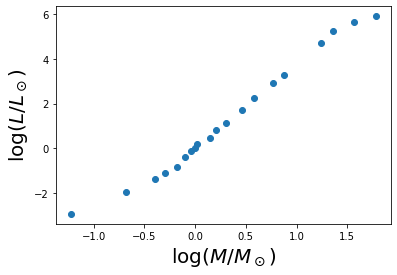

In [5]:
#Take the log of the values
x  = np.log10(tbl['M'])
y  = np.log10(tbl['L'])

plt.scatter(x,y) # plot logM vs. logL
plt.xlabel("$\log (M/M_\odot)$", fontsize=20)
plt.ylabel("$\log (L/L_\odot)$", fontsize=20)

In [7]:
#Jupyter Saves variables between cells, so as long as the cell in which x and y are defined as 
#logL and logM is above this, they will remain defined as those. 

#Python has a lot of functions/tasks already coded. When you have to fit a line, or make a specific plot, 
#you should ALWAYS look for existing functions to do this. 

#E.g. the below will specify we wish to fit a linar model (straightline fit). 
#The intercept should be 0,0 (the position of the Sun!)
model = models.Linear1D()

#Use linear least squares fitting routine
#Notice that these modules are loaded in the first cell of this Notebook. 
fitter = fitting.LinearLSQFitter()

best_fit = fitter(model, x, y)
print(best_fit)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept     
    ----------------- -------------------
    3.357929334861821 0.20384802030690535


MARKDOWN YOU SHOULD EDIT: Please write in words what relationship this implies of the form $L \propto M^{\alpha}$ (i.e. what is the value of $\alpha$).

TODO: in the plot below make the data points the same colour you chose above, and also change the colour of the line.

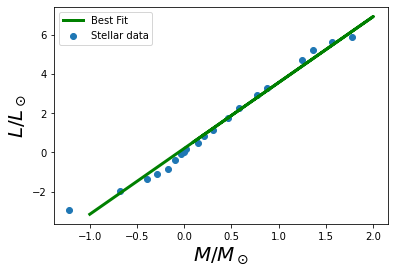

In [8]:
#As a final step we can overplot this on the data. 
#best_fit(x) provides the value of the function at any x value

#define an array which goes from -1 to in steps of 0.1 which we will use in the plotting.
#best_fit(xplot) will calculate the respective "y" values to plot from the fit.

xplot=[-1,2,0.1]
#Plot
plt.scatter(x,y,label='Stellar data') # plot logM vs. logL
plt.plot(xplot, best_fit(xplot), color='g', linewidth=3,label='Best Fit')
plt.xlabel("$M/M_\odot$", fontsize=20)
plt.ylabel("$L/L_\odot$", fontsize=20)
plt.legend()


# Your Turn  - plotting and fitting#

## Mass-Radius Relation ##
Now copy and modify the code above to plot $\log R/R_\odot$ versus $\log (M/M_\odot)$ for the main sequence stars listed in the Stellar Data sheet. If you assume the relation $R/R\odot= (M/M\odot)^\beta$, then what value of $\beta$ best fits the plotted data? Make sure to make a plot showing both the fit and data.

If you need more cells, you can using "Insert" in the menu above to add them. Please write an answer for the value of $\beta$ into a markdown cell.  

## Central Temperature and Luminosity ##
In this part you will make use of the constant density approximation (from in class) which allowed use to derive an equation for the central temperature in a star, estimate the central temperature of the stars (you may assume they all have the same composition as the Sun, i.e. $\mu = 0.6$). 

You will need to write code which uses this equation to calculate the central temperatures from the mass and radius values in the table, and plot against $\log (L/L_{\odot})$ (also from the table). Comment once more on the comparison between the range of luminiosities and the range of central temperatures.  

Astropy has something really helpful here = <a href="http://learn.astropy.org/rst-tutorials/quantities.html">constants</a>.... so I've got things started by importing some that you will need. 

HINT: pay close attention to units, and to your brackets when coding the formula. 

HINT2: If you have never done algebra using arrays in Python before, there is an introduction to what this is all about in Section 2.3-2.5 of the <a href="https://prappleizer.github.io/index.html">Python for Astronomers</a> book. It's probably easier than you think, and the TAs can help. 



In [14]:
from astropy.constants import G, k_B, m_p, M_sun, R_sun
#You can get all kinds of information about where these values come from and the units by doing this. 
print(G, k_B, m_p, M_sun, R_sun)
print('To get just the value (but be careful about units!) use this: ', G.value)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018   Name   = Boltzmann constant
  Value  = 1.380649e-23
  Uncertainty  = 0.0
  Unit  = J / K
  Reference = CODATA 2018   Name   = Proton mass
  Value  = 1.67262192369e-27
  Uncertainty  = 5.1e-37
  Unit  = kg
  Reference = CODATA 2018   Name   = Solar mass
  Value  = 1.988409870698051e+30
  Uncertainty  = 4.468805426856864e+25
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2018   Name   = Nominal solar radius
  Value  = 695700000.0
  Uncertainty  = 0.0
  Unit  = m
  Reference = IAU 2015 Resolution B 3
To get just the value (but be careful about units!) use this:  6.6743e-11
